In [2]:
import sys
sys.path.append('..')

import os
import time

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
dataframe = []

# Poincare

## Poincare PreProcessing

In [3]:
from preprocess.cinc2017 import preprocess_cinc2017

In [4]:
# Poincare generation
start = time.time()

data_dir = os.path.join('/home/huypham/Projects/ecg/dataset/cinc2017/raw', 'training')
data_label = os.path.join('/home/huypham/Projects/ecg/dataset/cinc2017/raw', 'training/REFERENCE.csv')
output_image_dir = '/tmp/cinc2017'
output_label = '/tmp/cinc2017/y_{}.csv'
os.makedirs(output_image_dir, exist_ok=True)

preprocess_cinc2017(data_dir, data_label, output_image_dir, output_label)

stop = time.time()

print('Processing time:', stop - start)

train:   0%|          | 0/5116 [00:00<?, ?it/s]

val:   0%|          | 0/1706 [00:00<?, ?it/s]

test:   0%|          | 0/1706 [00:00<?, ?it/s]

Processing time: 287.3779900074005


In [5]:
poincare_process_time = (stop - start)/(5116 + 1706 + 1706)
print(poincare_process_time)

0.033698169559967225


In [6]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint


from data.images.images import PtbXlDataModule
from models.images.images import ImageClassifier

Global seed set to 42
Global seed set to 42


In [7]:
class args:
    data_path = '/home/huypham/Projects/ecg/dataset/cinc2017/'
    batch_size = 1
    model_barebone = 'resnet50'
    learning_rate = 1e-5
    max_epochs = 50
    log_dir = '/tmp/logs'
    resume_from_checkpoint = None
    seed = 42

In [8]:
train_dir = os.path.join(args.data_path, 'processed')
train_label = os.path.join(args.data_path, 'processed/y_train.csv')
val_dir = os.path.join(args.data_path, 'processed')
val_label = os.path.join(args.data_path, 'processed/y_val.csv')
test_dir = os.path.join(args.data_path, 'processed')
test_label = os.path.join(args.data_path, 'processed/y_test.csv')

datamodule = PtbXlDataModule(
    train_dir=train_dir,
    train_label=train_label,
    val_dir=val_dir,
    val_label=val_label,
    test_dir=test_dir,
    test_label=test_label,
    batch_size=args.batch_size
)

classes = datamodule.train_dataset.labels.columns
print('Train data lenghth:', len(datamodule.train_dataset))   

Global seed set to 42
Global seed set to 42


Train data lenghth: 5116


## ResNet50

In [9]:
start = time.time()

model = ImageClassifier(
    classes=classes,
    barebone='resnet50',
    learning_rate=args.learning_rate,
    loss_type='bce'
)

trainer = pl.Trainer(
    accelerator='cpu',
    deterministic=False,
)

trainer.test(
    model=model,
    datamodule=datamodule,
    ckpt_path='/home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/poincare/resnet50/lightning_logs/version_0/ckpt/best-epoch=3-val_loss=0.32-val_f1=0.71.ckpt',
)

stop = time.time()


Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/poincare/resnet50/lightning_logs/version_0/ckpt/best-epoch=3-val_loss=0.32-val_f1=0.71.ckpt
Loaded model weights from checkpoint at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/poincare/resnet50/lightning_logs/version_0/ckpt/best-epoch=3-val_loss=0.32-val_f1=0.71.ckpt
Global seed set to 42


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         test_f1            0.7175572514533997
        test_loss           0.31067538261413574
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [10]:
print('Prediction time:', stop - start)
resnet50 = (stop-start)/1706
print('Per image:', resnet50)

Prediction time: 64.64745163917542
Per image: 0.037894168604440455


## DenseNet121

In [11]:
start = time.time()

model = ImageClassifier(
    classes=classes,
    barebone='densenet121',
    learning_rate=args.learning_rate,
    loss_type='bce'
)

trainer = pl.Trainer(
    accelerator='cpu',
    deterministic=False,
)

trainer.test(
    model=model,
    datamodule=datamodule,
    ckpt_path='/home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/poincare/densenet121/lightning_logs/version_0/ckpt/best-epoch=9-val_loss=0.30-val_f1=0.75.ckpt',
)

stop = time.time()

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/poincare/densenet121/lightning_logs/version_0/ckpt/best-epoch=9-val_loss=0.30-val_f1=0.75.ckpt
Loaded model weights from checkpoint at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/poincare/densenet121/lightning_logs/version_0/ckpt/best-epoch=9-val_loss=0.30-val_f1=0.75.ckpt
Global seed set to 42


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         test_f1            0.7675208449363708
        test_loss           0.29199057817459106
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [12]:
print('Prediction time:', stop - start)
densenet121 = (stop-start)/1706
print('Per image:', densenet121)

Prediction time: 65.08636736869812
Per image: 0.03815144628880312


# 1D CNN

In [13]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint

from data.timeseries.timeseries import TimeSeriesDataModule
from models.timeseries.cnn import Net1DLightningModule

import warnings
warnings.filterwarnings(action='ignore')

In [14]:
class args:
    data_path='/home/huypham/Projects/ecg/dataset/cinc2017/raw/training'
    csv_path='/home/huypham/Projects/ecg/dataset/cinc2017/processed'
    batch_size=1
    learning_rate=1e-5
    max_epochs=100
    log_dir='./logs/cnn1d'
    resume_from_checkpoint=None
    seed=42

In [15]:
def set_seed(seed=0):
    import numpy, torch, random
    numpy.random.seed(seed)
    torch.random.manual_seed(seed)
    random.seed(seed)

In [16]:
start = time.time()

set_seed(args.seed)
train_dir = args.data_path
val_dir = train_dir
test_dir = train_dir

train_label = os.path.join(args.csv_path, 'y_train.csv') # '/home/huypham/Projects/ecg/dataset/cinc2020/processed/y_train.csv'
val_label = os.path.join(args.csv_path, 'y_val.csv')
test_label = os.path.join(args.csv_path, 'y_test.csv')

data_module = TimeSeriesDataModule(
    train_dir=train_dir,
    train_label=train_label,
    val_dir=val_dir,
    val_label=val_label,
    test_dir=test_dir,
    test_label=test_label,
    batch_size=args.batch_size
)

train_dataloader = data_module.train_dataloader()
classes = data_module.train_dataset.classes
class_weights = data_module.train_dataset.class_weights

val_dataloader = data_module.val_dataloader()
test_dataloader = data_module.test_dataloader()

stop = time.time()

Global seed set to 42
Global seed set to 42


  0%|          | 0/5116 [00:00<?, ?it/s]

Global seed set to 42


  0%|          | 0/1706 [00:00<?, ?it/s]

Global seed set to 42


  0%|          | 0/1706 [00:00<?, ?it/s]

In [17]:
print('Processing time:', stop - start)
ts_processing_time = (stop-start)/(5116 + 1706 + 1706)
print('Per image:', ts_processing_time)

Processing time: 114.5883002281189
Per image: 0.013436714379469852


In [18]:
start = time.time()

model = Net1DLightningModule(classes=classes, class_weights=class_weights)

trainer = pl.Trainer(
    accelerator='cpu'
)

trainer.test(model, dataloaders=test_dataloader, ckpt_path='/home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/cnn1d/lightning_logs/version_0/ckpt/best-epoch=97-val_loss=0.03-val_f1=0.83.ckpt')

stop = time.time()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/cnn1d/lightning_logs/version_0/ckpt/best-epoch=97-val_loss=0.03-val_f1=0.83.ckpt
Loaded model weights from checkpoint at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/cnn1d/lightning_logs/version_0/ckpt/best-epoch=97-val_loss=0.03-val_f1=0.83.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         test_f1            0.8440586924552917
        test_loss           0.02824728935956955
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [19]:
print('Prediction time:', stop - start )
cnn1d = (stop-start) / (1706)
print('Per image:', cnn1d)

Prediction time: 46.99606394767761
Per image: 0.027547516968158037


# 1D ResNet

In [20]:
class args:
    data_path='/home/huypham/Projects/ecg/dataset/cinc2017/raw'
    csv_path='/home/huypham/Projects/ecg/dataset/cinc2017/processed'
    batch_size=32
    learning_rate=1e-4
    max_epochs=500
    log_dir='./logs/resnet1d'
    resume_from_checkpoint=None
    seed=42

In [21]:
from models.timeseries.resnet1d import ResNet1DLightningModule

start = time.time()

model = ResNet1DLightningModule(
    classes=classes,
    class_weights=class_weights,
    learning_rate=args.learning_rate,
)

trainer = pl.Trainer(
    accelerator='cpu'
)

trainer.test(model, dataloaders=test_dataloader, ckpt_path='/home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/resnet1d/lightning_logs/version_0/ckpt/best-epoch=97-val_loss=0.03-val_f1=0.83.ckpt')

stop = time.time()

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/resnet1d/lightning_logs/version_0/ckpt/best-epoch=97-val_loss=0.03-val_f1=0.83.ckpt
Loaded model weights from checkpoint at /home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/resnet1d/lightning_logs/version_0/ckpt/best-epoch=97-val_loss=0.03-val_f1=0.83.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         test_f1            0.8426604270935059
        test_loss          0.028243662789463997
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [22]:
print('Prediction time:', stop - start )
resnet1d = (stop-start) / (1706)
print('Per image:', resnet1d)

Prediction time: 32.087175369262695
Per image: 0.01880842635947403


# XGBoost

In [21]:
import pandas as pd

from preprocess.cinc2017 import process_cinc2017_timeseries
from preprocess.utils import *

In [22]:
import joblib
search = joblib.load('/home/huypham/Projects/ecg/logs_with_eco2ai/logs_cinc2017/tabular/search.pkl')

[00:58:00] WARNING: ../src/gbm/gbtree.cc:405: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[00:58:00] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


In [23]:
class args:
    data_path='/home/huypham/Projects/ecg/dataset/cinc2017/raw/training'
    output_dir='/tmp/cinc2017/processed'
    sampling_rate=300

In [24]:
os.makedirs(args.output_dir, exist_ok=True)

In [25]:
train_df = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2017/processed/y_train.csv')
val_df = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2017/processed/y_val.csv')
test_df = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2017/processed/y_test.csv')

train_files = [os.path.join(args.data_path, i) for i in train_df['idx'].to_list()]
val_files = [os.path.join(args.data_path, i) for i in val_df['idx'].to_list()]
test_files = [os.path.join(args.data_path, i) for i in test_df['idx'].to_list()]

X_test = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2017/processed/test_features.csv')
y_test = test_df.drop(columns=['idx']).to_numpy()

# train_features = extract_ts_features(train_files, verbose=True)
# train_features.to_csv(os.path.join(args.output_dir, 'train_features.csv'), index=False)

# val_features = extract_ts_features(val_files, verbose=True)
# val_features.to_csv(os.path.join(args.output_dir, 'val_features.csv'), index=False)

In [101]:
mask = search.best_estimator_[0][3].get_support()
selected_columns = [c for m, c in zip(mask, X_test.columns) if m]

tsfresh_settings = {}
for col in selected_columns:
    parts = col.split('__')
    # print(parts)
    # if len(parts) == 2:
    #     tsfresh_settings[parts[1]] = None
    # elif len(parts) == 3:
    #     name = parts[1]
    #     k, v = parts[2].rsplit('_', 1)

    #     try:
    #         v_ = int(v)
    #     except:
    #         v_ = v

    #     if name in tsfresh_settings:
    #         tsfresh_settings[name].append({k: v_})
    #     else:
    #         tsfresh_settings[name] = [{k: v_}]
    tsfresh_settings[parts[1]] = EfficientFCParameters()[parts[1]]

In [102]:
start = time.time()

test_features = extract_ts_features(test_files, settings=tsfresh_settings, verbose=True)
test_features.to_csv(os.path.join(args.output_dir, 'test_features.csv'), index=False)

stop = time.time()

  0%|          | 0/1706 [00:00<?, ?it/s]

Exception ignored in: <function _releaseLock at 0x7f3c33186e60>
Traceback (most recent call last):
  File "/home/huypham/miniconda3/envs/ecg/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


In [32]:
print('Processing time:', stop - start )
tabular_processing_time = (stop-start) / (1706)
print('Per image:',  tabular_processing_time)

Processing time: 0.38675975799560547
Per image: 0.00022670560257655656


In [29]:
search.best_estimator_[-1].gpu_id=-1

In [30]:
start = time.time()


search.predict(X_test)

stop = time.time()

/home/huypham/miniconda3/envs/ecg/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [31]:
print('Processing time:', stop - start )
xgb = (stop-start) / (1706)
print('Per image:',  xgb)

Processing time: 0.03935599327087402
Per image: 2.306916369922276e-05


# Summary

In [7]:
import seaborn as sns

In [31]:
report = [
    dict(model='ResNet50', processing=poincare_process_time, prediction=resnet50),
    dict(model='DenseNet121', processing=poincare_process_time, prediction=densenet121),
    dict(model='1D CNN', processing=ts_processing_time, prediction=cnn1d),
    dict(model='1D ResNet', processing=ts_processing_time, prediction=resnet1d),
    dict(model='XGBoost', processing=tabular_processing_time, prediction=xgb),
]

In [38]:
# print(report)
"""[{'model': 'ResNet50', 'processing': 0.033698169559967225, 'prediction': 0.037894168604440455}, {'model': 'DenseNet121', 'processing': 0.033698169559967225, 'prediction': 0.03815144628880312}, {'model': '1D CNN', 'processing': 0.013436714379469852, 'prediction': 0.027547516968158037}, {'model': '1D ResNet', 'processing': 0.013436714379469852, 'prediction': 0.01880842635947403}, {'model': 'XGBoost', 'processing': 1.7176005028336716, 'prediction': 0.00022670560257655656}]"""

"[{'model': 'ResNet50', 'processing': 0.033698169559967225, 'prediction': 0.037894168604440455}, {'model': 'DenseNet121', 'processing': 0.033698169559967225, 'prediction': 0.03815144628880312}, {'model': '1D CNN', 'processing': 0.013436714379469852, 'prediction': 0.027547516968158037}, {'model': '1D ResNet', 'processing': 0.013436714379469852, 'prediction': 0.01880842635947403}, {'model': 'XGBoost', 'processing': 1.7176005028336716, 'prediction': 0.00022670560257655656}]"

In [4]:
report = [{'model': 'ResNet50', 'processing': 0.033698169559967225, 'prediction': 0.037894168604440455}, {'model': 'DenseNet121', 'processing': 0.033698169559967225, 'prediction': 0.03815144628880312}, {'model': '1D CNN', 'processing': 0.013436714379469852, 'prediction': 0.027547516968158037}, {'model': '1D ResNet', 'processing': 0.013436714379469852, 'prediction': 0.01880842635947403}, {'model': 'XGBoost', 'processing': 1.7176005028336716, 'prediction': 0.00022670560257655656}]

In [43]:
df = pd.DataFrame(report)
df[df.select_dtypes(include=['number']).columns] *= 1000
df = df.set_index('model')
# df.to_csv('./timing.csv', index=False)

In [47]:
df['total'] = df['processing'] + df['prediction']

print(df.round(1).to_markdown())

| model       |   processing |   prediction |   total |
|:------------|-------------:|-------------:|--------:|
| ResNet50    |         33.7 |         37.9 |    71.6 |
| DenseNet121 |         33.7 |         38.2 |    71.8 |
| 1D CNN      |         13.4 |         27.5 |    41   |
| 1D ResNet   |         13.4 |         18.8 |    32.2 |
| XGBoost     |       1717.6 |          0.2 |  1717.8 |


In [50]:
df

,processing,prediction,total
model,,,
ResNet50,33.698170,37.894169,71.592338
DenseNet121,33.698170,38.151446,71.849616
1D CNN,13.436714,27.547517,40.984231
1D ResNet,13.436714,18.808426,32.245141
XGBoost,1717.600503,0.226706,1717.827208


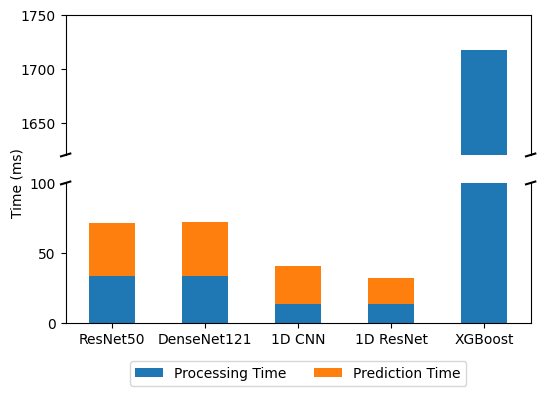

In [136]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,100)
ax1.set_ylim(1620,1720)
ax2.set_yticks(np.arange(0, 101, 50))
ax1.set_yticks(np.arange(1650, 1751, 50))
df.drop(columns=['total']).plot(ax=ax1, kind='bar', stacked=True)
df.drop(columns=['total']).plot(ax=ax2, kind='bar', stacked=True)
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)

d = .01
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax1.get_legend().remove()
ax2.legend(
    loc='lower center', ncols=2, bbox_to_anchor=(0.5, -0.5, 0, 0)
)
ax2.get_legend().get_texts()[0].set_text('Processing Time')
ax2.get_legend().get_texts()[1].set_text('Prediction Time')
# ax2.get_legend().remove()


plt.xlabel('')
ax2.set_ylabel('Time (ms)', y=1)
plt.savefig('inference_time.pdf', bbox_inches='tight', dpi=100)

In [59]:
# sns.barplot(data=df, x='model', y='total')
# plt.yscale('log')
# df.drop(columns=['total']).plot(kind='bar', stacked=True)
# plt.yscale('log')